# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [188]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [189]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.



In [190]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [191]:
# Create a BeautifulSoup object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [192]:
# Extract all rows of data
table = soup.find('table')
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [193]:
# Create an empty list to store the data
data = []
data_rows = table.find_all('tr')

for row in data_rows:
    cols = row.find_all('td')
    if len(cols) >= 7:
        id = cols[0].text
        terrestrial_date = cols[1].text
        sol = cols[2].text
        ls = cols[3].text
        month = cols[4].text
        min_temp = cols[5].text
        pressure = cols[6].text
        
        data.append({'id': id, 'terrestrial_date': terrestrial_date, 'sol': sol, 'ls': ls, 'month': month, 'min_temp': min_temp, 'pressure': pressure})

data
    

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [194]:
# Create a pandas DataFrame
mars_df = pd.DataFrame(data)
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.



In [195]:
# Examining the data type
mars_df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [196]:
# Change data types for data analysis
mars_df= mars_df.astype({"sol":"int64", "ls":"int64", "month":"int64","min_temp":"float64", "pressure":"float64"})
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.dtypes


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [197]:
# 1. How many months are there on Mars
mars_df.groupby('month').size()


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
dtype: int64

In [198]:
# 2. How many Martian days' worth of data are there?
mars_df['sol'].count()

1867

In [199]:
# 3. What is the average low temperature by month?
mars_df.groupby('month')['min_temp'].mean()


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

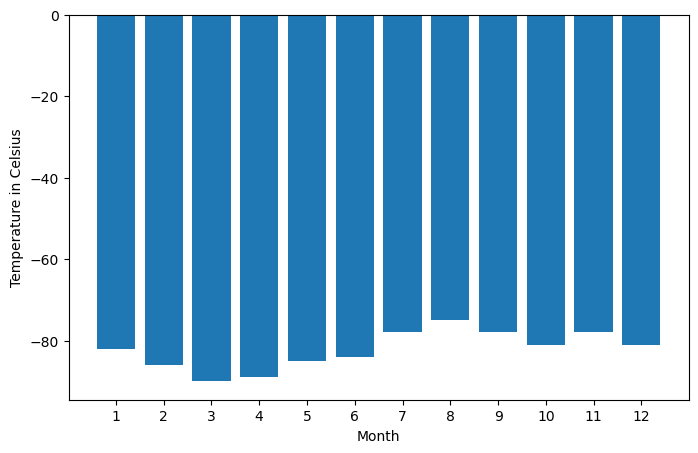

In [200]:
# Bar Plot the average temperature by each month
plt.figure(figsize=(8, 5))
plt.bar(mars_df['month'], mars_df['min_temp'])
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [201]:
# Identify the coldest month
mars_df.groupby('month')['min_temp'].mean().idxmin()

# Identify the hottest month
mars_df.groupby('month')['min_temp'].mean().idxmax()

# Print the coldes and hottest month
print(f'The coldest month is {mars_df.groupby("month")["min_temp"].mean().idxmin()}')
print(f'The hottest month is {mars_df.groupby("month")["min_temp"].mean().idxmax()}')



The coldest month is 3
The hottest month is 8


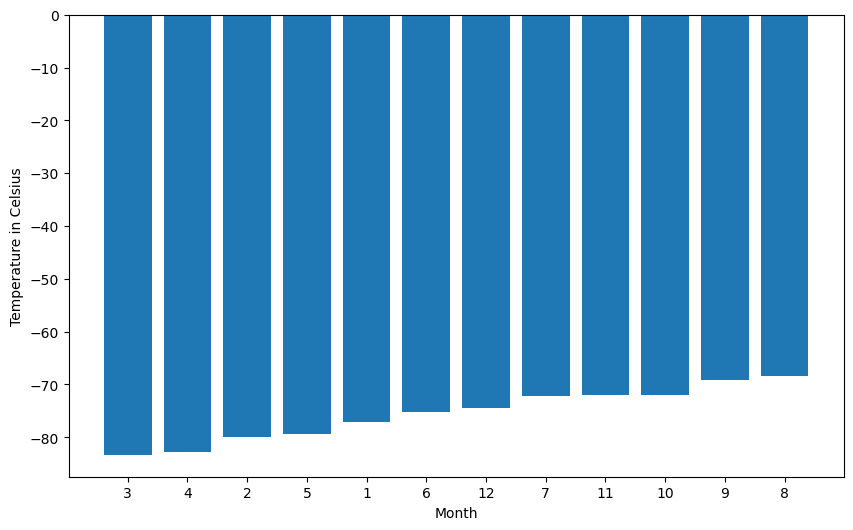

In [202]:
# Group by month and calculate average minimum temperature
avg_min_temp = mars_df.groupby('month')['min_temp'].mean()

# Define the order of the months
month_order = [3, 4, 2, 5, 1, 6, 12, 7, 11, 10, 9, 8]

# Reorder the temperatures according to the month order
ordered_avg_min_temp = avg_min_temp.reindex(month_order)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(ordered_avg_min_temp)), ordered_avg_min_temp.values, tick_label=ordered_avg_min_temp.index)
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [218]:
# 4. What is the average pressure by month?
mars_df.groupby('month')['pressure'].mean()

# Create a df for average pressure by month
avg_pressure = mars_df.groupby('month')['pressure'].mean()
avg_pressure.df = pd.DataFrame(avg_pressure)
avg_pressure.df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


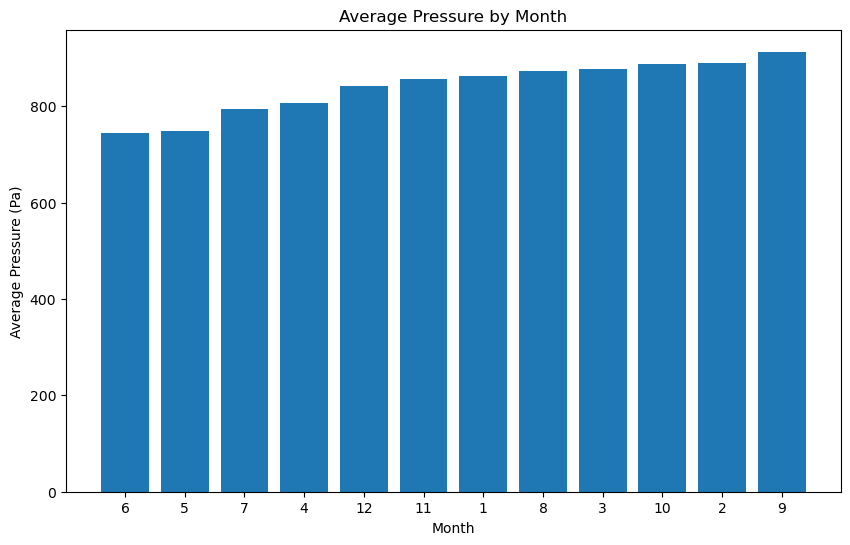

In [219]:
# Plot the average pressure by each month
avg_pressure = mars_df.groupby('month')['pressure'].mean()
month_order = [6, 5, 7, 4, 12, 11, 1, 8, 3, 10, 2, 9]
ordered_avg_pressure = avg_pressure.reindex(month_order)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(ordered_avg_pressure)), ordered_avg_pressure.values, tick_label=ordered_avg_pressure.index)
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.title('Average Pressure by Month')
plt.show()

In [220]:
# 5. How many terrestrial (earth) days are there in a Martian year? 
# How any days elapse on earth in the time it takes Mars to complete one orbit around the sun?
mars_df['terrestrial_date'].max() - mars_df['terrestrial_date'].min()


Timedelta('2021 days 00:00:00')

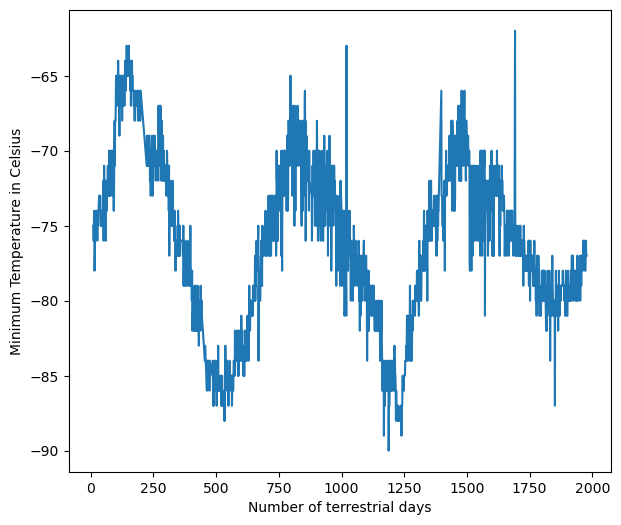

In [217]:
# Plot the days elapsed on Earth by each month
fig, ax = plt.subplots(figsize=[7,6])
ax = plt.plot(mars_df.sol, mars_df.min_temp)
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature in Celsius')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [224]:
# Export the Mars data to a CSV file
mars_df.to_csv('/Users/vrindapatel/Desktop/Starter_Code/mars_data.csv', index=False)

In [212]:
# Close the browser
browser.quit()